# Practical work 2 : Fourier transform

This practial work is dedicated to the study of the discrete Fourier transform applied on the two following images:
![son.png](./img/son.png)
![sonrot.png](./img/sonrot.png)
and analyze the properties of their spectrum. To this end, we make use of the following functions provided by the module `numpy.fft`:

- `fft2()` to compute the Fourier transform on an image
- `fftshift()` to center the low frequencies
- `abs()` (from `numpy`) to compute the module of a complexe array

In most of cases, high frequencies have lower energy compare to low frequencies. We will use a logarithmic scale by applying $\log(1+abs(TF))$ to display the spectrum.

In [1]:
import numpy as np
from numpy.fft import fft2,fftshift
from PIL import Image

son = np.array(Image.open('img/son.png'))
sonrot = np.array(Image.open('img/sonrot.png'))

## Exercice: properties of Fourier transform applied on natural images
1. Write the following functions:
 - `computeFT(I)` returning the Fourier transform of image `I`,
 - `toVisualizeFT(If)` returning the centered module of a complex array `If` (the Fourier transform of an image),
 - `toVisualizeLogFT(If)` similar to the previous function but use a logarithmic scale.

In [2]:
def computeFT(I):
    """ Array -> Array[complex] """
    return fft2(I)

def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    return fftshift(np.abs(If))

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    return fftshift(np.log(1+np.abs(If)))

2. Write a series of instructions that
 - compute the Fourier transform of `son` and `sonrot`,
 - compute and display the module using a logarithmic scale,
 - threshold the module with a parameter of $1.10^5$ (use the function of TME1)
 - display the thresholded spectrum

In [3]:
def thresholdImage(I,s):
    nI = I.copy()
    return np.where(nI <= s, 0, 255)

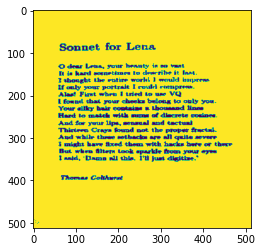

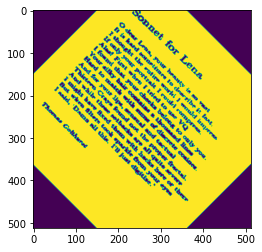

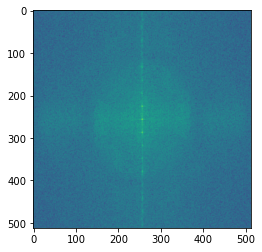

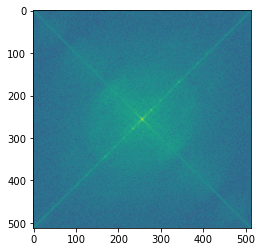

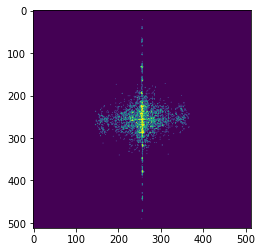

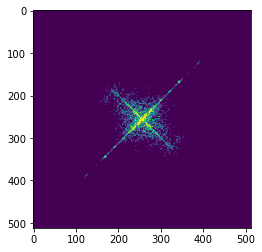

In [4]:
import matplotlib.pyplot as plt

# your code below
FTson = computeFT(son)
FTsonrot = computeFT(sonrot)

plt.imshow(son)
plt.show()
plt.imshow(sonrot)
plt.show()


LOGson = toVisualizeLogFT(FTson)
LOGsonrot = toVisualizeLogFT(FTsonrot)

plt.imshow(LOGson)
plt.show()
plt.imshow(LOGsonrot)
plt.show()

THRson = thresholdImage(toVisualizeFT(FTson), 1e5)
THRsonrot = thresholdImage(toVisualizeFT(FTsonrot), 1e5)

plt.imshow(THRson)
plt.show()
plt.imshow(THRsonrot)
plt.show()

3. Interpretation: discuss the results obtained on thresholded FT module. What property of the Fourier transform is shown ?

Dans les deux cas (image 1 et image 2) nous observons une croix centrale lumineuse à la différence prêt d'une rotation d'environ 45°. Ceci paraît cohérent par rapport à la différence entre les deux images étudiées. On comprend ici que l'analyse des fréquences donne des informations sur l'orientation de l'image. Ceci met en avant la notion de fréquence spatial: les fréquences horizontales reflètent la vitesse variation du signal sur l'axe des abscisses et les fréquences verticales celle de l'axe des ordonnées. La composition des deux permet d'étudier les variations par rapport à un angle donné.

4. Write the function `blend()` getting two images, one float parameter $\alpha\in[0,1]$, calculating $\alpha I_1+(1-\alpha)I_2$ and returning the result. 

In [5]:
def blend(I1,I2,alpha):
    """ Array**2*float -> Array """
    return alpha*I1 + (1-alpha)*I2

5. Apply the previous function on images `son` and `sonrot` and $\alpha=\frac12$, compute the Fourier transform, threshold the module and visualize the result. 

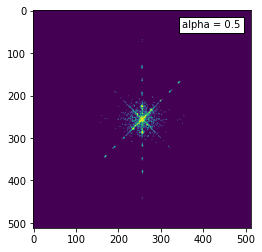

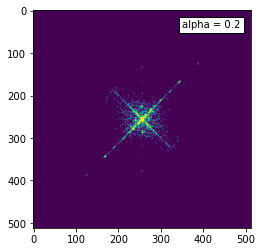

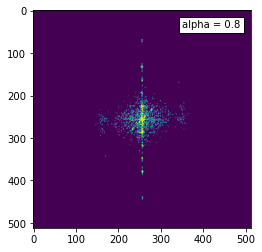

In [6]:
# Avec une superposition des images avec alpha = 0.5, les deux images ont le même poids 
# dans l'image résultante
FT_Blend = computeFT(blend(son, sonrot, 0.5))
THR_FT_Blend = thresholdImage(toVisualizeFT(FT_Blend), 1e5)

plt.imshow(THR_FT_Blend)
plt.text(350, 40, 'alpha = 0.5', bbox={'facecolor': 'white', 'pad': 3})
plt.show()

# Alpha est proche de 0, l'image 2 a un poids plus important que l'image 1
FT_Blend = computeFT(blend(son, sonrot, 0.2))
THR_FT_Blend = thresholdImage(toVisualizeFT(FT_Blend), 1e5)

plt.imshow(THR_FT_Blend)
plt.text(350, 40, 'alpha = 0.2', bbox={'facecolor': 'white', 'pad': 3})
plt.show()

# Alpha est proche de 1, l'image 1 a un poids plus important que l'image 2
FT_Blend = computeFT(blend(son, sonrot, 0.8))
THR_FT_Blend = thresholdImage(toVisualizeFT(FT_Blend), 1e5)

plt.imshow(THR_FT_Blend)
plt.text(350, 40, 'alpha = 0.8', bbox={'facecolor': 'white', 'pad': 3})
plt.show()

6. Compare the latter result with those of question 2: what property of the Fourier transform is shown? What is the behaviour of $\alpha$ in the resulting spectrum?

On remarque une superposition des spectres obtenus à la question 2. En effet on voit les deux croix superposées l'une sur l'autre. Ceci s'explique par la formule retournée par `blend`, avec alpha proche de 0 on verra principalement l'image 2 et avec alpha proche de 1 on verra principalement l'image 1. Ici avec apha = 0.5 les deux images sont superposées à parts égales.

7. We want to determine the text orientation in image `sonrot` and produce a new image with horizontal text. Write the function `rectifyOrientation()` that:

 + computes the FT module of image given in parameter and threshold it at $3\times 10^{5}$,
 + from thresholded module determines the main orientation using the function `mainOrientation()` 
 + produces the rectified image applying a rotation with a suitable angle using `rotateImage()`

In [7]:
def mainOrientation(I):
    """ Array -> tuple[Iori,float]
        return image of orientation (32 bins) and the main orientation (degree) from a Fourier transform module
    """
    n, m = I.shape

    size = 32
    x = np.array(range(size))
    ori = np.vstack((np.cos(np.pi*x/size), np.sin(np.pi*x/size))).T

    Iori = np.zeros((n, m))
    orients = np.zeros((size))

    for i in range(1,n+1):
        for j in range(1,m+1):
            if I[i-1, j-1] > 0:
                v = np.array([j-m/2, -i + n/2])
                if i > n/2:
                    v = -v
                    prod = np.matmul(ori, v)
                    maxi = prod.max()
                    if maxi > 0:
                        imax = np.nonzero(prod == maxi)
                        Iori[i-1, j-1] = imax[0]
                        orients[imax] += 1

    maxori = np.nonzero(orients == orients.max())[0][0]
    return (Iori, 180*maxori/size - 90)

def rotateImage(I,a):
    """ Array*float -> Array 
        return a rotation of angle a (degree) of image I
    """
    return np.array(Image.fromarray(I).rotate(a, expand=True, fillcolor=127))

####### your code below
def rectifyOrientation(I):
    THR_FT_I = thresholdImage(computeFT(I), 3e5)
    Iori, deg = mainOrientation(toVisualizeFT(THR_FT_I))
    print("Décallage:", deg)
    return rotateImage(I, -deg)

8. Experiment `rectifyOrientation()` on `sonrot`, and on a rotation of `img/port.jpg` (using `rotateImage()`) with various rotation angles.  

Décallage: -45.0


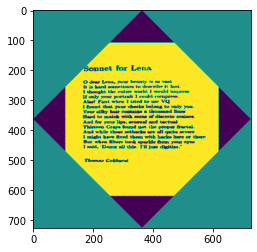

In [8]:
plt.imshow(rectifyOrientation(sonrot))
plt.show()

Décallage: 5.625


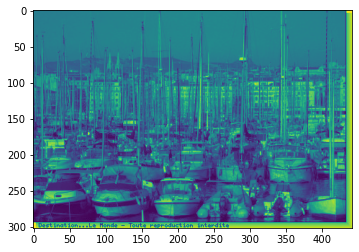

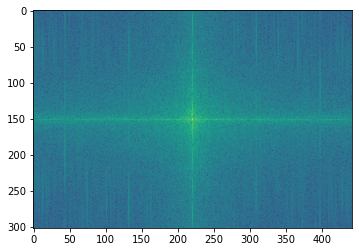

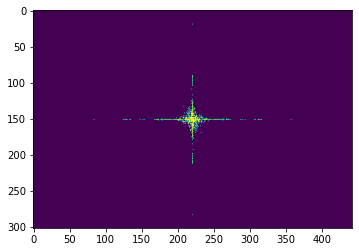

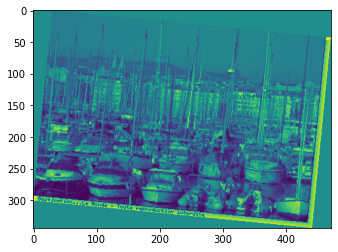

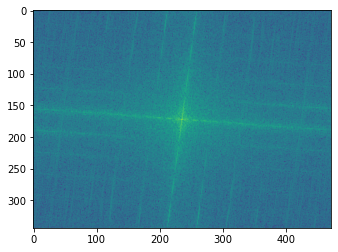

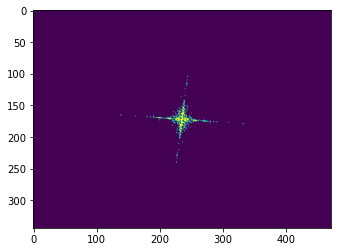

In [9]:
port = np.array(Image.open('img/port.jpg'))

# Observation port avec rotation de 0° puis correction
FTport = computeFT(port)
LOGport = toVisualizeLogFT(FTport)
THRport = thresholdImage(toVisualizeFT(FTport), 1e5)

portRectified = rectifyOrientation(port)
LOGportRectified = toVisualizeLogFT(computeFT(portRectified))
THRportRectified = thresholdImage(toVisualizeFT(computeFT(portRectified)), 1e5)

plt.imshow(port)
plt.show()

plt.imshow(LOGport)
plt.show()

plt.imshow(THRport)
plt.show()

plt.imshow(portRectified)
plt.show()

plt.imshow(LOGportRectified)
plt.show()

plt.imshow(THRportRectified)
plt.show()

# On remarque que l'algorithme de correction a fait tourner l'image alors qu'elle avait le bon angle
# ceci s'observe aussi sur l'image des fréquences...

Décallage: 0.0


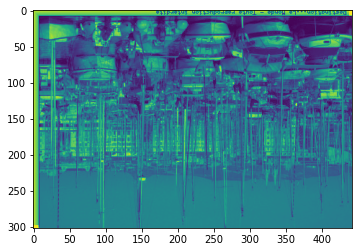

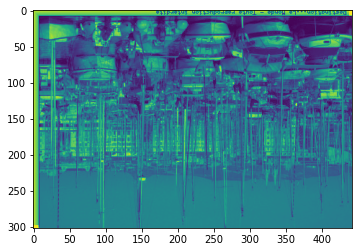

In [10]:
# Observation port avec rotation de 180° puis correction
portRotated = rotateImage(port, 180)
portRectified = rectifyOrientation(portRotated)

plt.imshow(portRotated)
plt.show()

plt.imshow(portRectified)
plt.show()

# Bizarrement le problème disparait avec une rotation à 180°, cependant l'image est renversée 
# même après la correction car la croix observée est par définition symétrique donc l'algorithme
# ne peut faire la différence dans ce cas ci entre haut et bas. On verra dans les exemples suivants
# qu'un problème de décallage persiste

Décallage: 22.5


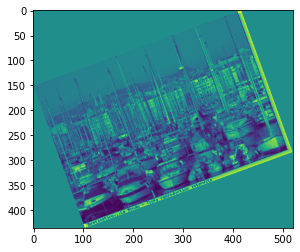

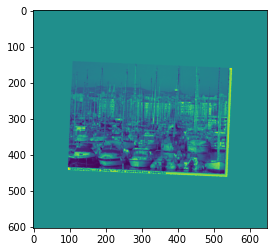

In [11]:
# Observation port avec rotation de 20° puis correction
portRotated = rotateImage(port, 20)
portRectified = rectifyOrientation(portRotated)

plt.imshow(portRotated)
plt.show()

plt.imshow(portRectified)
plt.show()

Décallage: 84.375


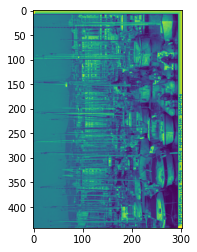

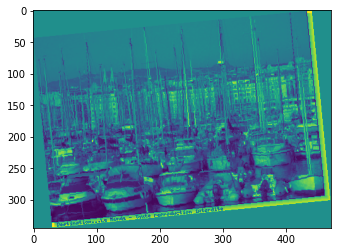

In [12]:
# Observation port avec rotation de 90° puis correction
portRotated = rotateImage(port, 90)
portRectified = rectifyOrientation(portRotated)

plt.imshow(portRotated)
plt.show()

plt.imshow(portRectified)
plt.show()

Décallage: 33.75


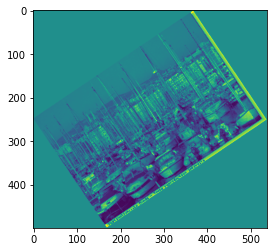

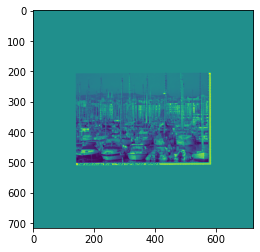

In [13]:
# Observation port avec rotation de 34° puis correction
portRotated = rotateImage(port, 34)
portRectified = rectifyOrientation(portRotated)

plt.imshow(portRotated)
plt.show()

plt.imshow(portRectified)
plt.show()